In [ ]:
import torch
from torchvision.datasets import CIFAR10
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tfms=transforms.Compose([transforms.ToTensor()])
train_data=CIFAR10(root='./data',train=True,transform=tfms,download=True)
test_data=CIFAR10(root='./data',train=False,download=True,transform=tfms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
batch_size=32
lr=.01
karnal_size=3
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [ ]:
trainiter=iter(train_loader)
images,labels=trainiter.next()
images.shape

torch.Size([32, 3, 32, 32])

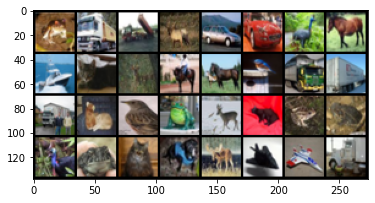

In [ ]:
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))

In [ ]:
def conv_layer(in_channels,out_channels,kernel_size):

    return nn.Sequential(
        nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU())

In [ ]:
class Conv_net(nn.Module):
    def __init__(self):
        super(Conv_net, self).__init__()
        self.layer1=conv_layer(3,16,3)
        self.layer2=conv_layer(16,32,3)
        self.layer3=conv_layer(32,64,3)
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(64*2*2,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.flatten(x)
        x=self.fc1(x)
        x=self.fc2(x)
        return x

In [ ]:
model=Conv_net()
model

Conv_net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
summary(model=model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
         MaxPool2d-2           [-1, 16, 15, 15]               0
              ReLU-3           [-1, 16, 15, 15]               0
            Conv2d-4           [-1, 32, 13, 13]           4,640
         MaxPool2d-5             [-1, 32, 6, 6]               0
              ReLU-6             [-1, 32, 6, 6]               0
            Conv2d-7             [-1, 64, 4, 4]          18,496
         MaxPool2d-8             [-1, 64, 2, 2]               0
              ReLU-9             [-1, 64, 2, 2]               0
          Flatten-10                  [-1, 256]               0
           Linear-11                   [-1, 50]          12,850
           Linear-12                   [-1, 10]             510
Total params: 36,944
Trainable params: 36,944
Non-trainable params: 0
---------------------------------

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [ ]:
def train(mode,trainloader,loss_fn=None,optimizer=None,seed=32,EPOCHS=100):
    torch.manual_seed(seed)
    cost=[]
    
    model.to(device)
    for epoch in range(EPOCHS):
        train_corr=[]
        for idx,(img,lbl) in enumerate(trainloader):
            ##1 Compute the Output
            img,lbl=img.to(device),lbl.to(device)
            yhat=model(img)
            
            ##2 Compute the Loss
            loss=loss_fn(yhat,lbl)

            ##3 Compute the gradients
            optimizer.zero_grad()
            loss.backward()

            ##4 update the model parameters
            optimizer.step()
            with torch.no_grad():
                yhat=model(img)
                loss=loss_fn(yhat,lbl)
                core_lbl=(torch.argmax(F.softmax(yhat,dim=1),dim=1)==lbl).sum().item()
                ##print('Model accuracy on this batch %.2f', core_lbl)
                train_corr.append(core_lbl)
        with torch.no_grad():
            acc=sum(train_corr)/len(train_data)*100
            
            print(f'After {epoch+1} Model Training Accuracy {acc}')


   


In [ ]:
len(train_data)

50000

In [ ]:
model=Conv_net()
cost=train(mode=model,trainloader=train_loader,loss_fn=loss_fn,optimizer=optimizer,EPOCHS=10)


After 1 Model Training Accuracy 9.998
After 2 Model Training Accuracy 9.998
After 3 Model Training Accuracy 9.998
After 4 Model Training Accuracy 9.998
After 5 Model Training Accuracy 9.998
After 6 Model Training Accuracy 9.998
After 7 Model Training Accuracy 9.998
After 8 Model Training Accuracy 9.998
After 9 Model Training Accuracy 9.998
After 10 Model Training Accuracy 9.998


In [ ]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
model = ConvNeuralNet(num_classes)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20], Loss: 2.0392
Epoch [2/20], Loss: 1.7994
Epoch [3/20], Loss: 1.1547
Epoch [4/20], Loss: 1.1812
Epoch [5/20], Loss: 0.7705
Epoch [6/20], Loss: 1.5763
Epoch [7/20], Loss: 1.4711
Epoch [8/20], Loss: 0.9615
Epoch [9/20], Loss: 1.1125
Epoch [10/20], Loss: 0.6064
Epoch [11/20], Loss: 1.5008
Epoch [12/20], Loss: 0.7809
Epoch [13/20], Loss: 0.9461
Epoch [14/20], Loss: 0.5715
Epoch [15/20], Loss: 1.0826
Epoch [16/20], Loss: 0.6299
Epoch [17/20], Loss: 0.9109
Epoch [18/20], Loss: 0.7368
Epoch [19/20], Loss: 0.6406
Epoch [20/20], Loss: 0.1131


In [ ]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
model = ConvNeuralNet(num_classes)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20], Loss: 1.5581
Epoch [2/20], Loss: 1.5771
Epoch [3/20], Loss: 0.8959
Epoch [4/20], Loss: 1.6174
Epoch [5/20], Loss: 1.2007
Epoch [6/20], Loss: 0.8553
Epoch [7/20], Loss: 0.8313
Epoch [8/20], Loss: 0.6717
Epoch [9/20], Loss: 1.2174
Epoch [10/20], Loss: 1.0488
Epoch [11/20], Loss: 0.9436
Epoch [12/20], Loss: 0.5438
Epoch [13/20], Loss: 0.8083
Epoch [14/20], Loss: 0.9634
Epoch [15/20], Loss: 0.9775
Epoch [16/20], Loss: 0.6761
Epoch [17/20], Loss: 0.7311
Epoch [18/20], Loss: 1.3291
